# Import library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

**Load dataset**

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")
submission_sample = pd.read_csv("SampleSubmission.csv")

**Explore data analysis**

In [3]:
submission_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place_ID X Date  16136 non-null  object
 1   target           16136 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 252.3+ KB


In [4]:
train_data.head(5)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_data.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [6]:
test_data.head(5)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16136 entries, 0 to 16135
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      16136 non-null  object 
 1   Date                                                 16136 non-null  object 
 2   Place_ID                                             16136 non-null  object 
 3   precipitable_water_entire_atmosphere                 16136 non-null  float64
 4   relative_humidity_2m_above_ground                    16136 non-null  float64
 5   specific_humidity_2m_above_ground                    16136 non-null  float64
 6   temperature_2m_above_ground                          16136 non-null  float64
 7   u_component_of_wind_10m_above_ground                 16136 non-null  float64
 8   v_component_of_wind_10m_above_ground                 16136 non-nul

In [9]:
test_data.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,14809.000000,14809.000000,14809.000000,14809.000000,...,11963.000000,11963.000000,11963.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,14.202076,71.136312,0.005513,8.651834,0.660754,0.113826,0.000098,0.000166,-1.089137,0.293308,...,34.894186,-122.992436,49.048986,945.230960,1766.062448,0.018122,0.587431,14.053838,-71.287981,24.113993
std,9.377060,18.357542,0.003261,8.033144,2.854376,2.914895,0.000084,0.000101,0.616871,0.306695,...,18.808611,76.258227,13.809821,930.249966,1755.875373,0.029822,55.802139,18.085361,87.392331,25.099069
min,0.900000,6.700000,0.000279,-26.628958,-15.837668,-14.043520,-0.000031,0.000000,-3.495448,0.000000,...,0.000000,-179.953644,0.000000,0.000000,0.000000,0.000000,-105.016572,0.000000,-179.924887,0.000000
25%,7.655303,60.000000,0.003401,3.201305,-1.040559,-1.590374,0.000059,0.000127,-1.525122,0.029981,...,18.517603,-166.951551,40.406972,0.000000,0.000000,0.000000,0.000000,0.000000,-163.013042,0.000000
50%,11.600000,74.800003,0.004610,7.482545,0.402638,0.043358,0.000079,0.000154,-1.172175,0.172885,...,36.782582,-158.740565,50.105448,1771.898988,2943.639456,0.003386,0.000000,1.538256,0.000000,21.074167
75%,18.100000,85.500000,0.006598,13.834132,2.167810,1.708833,0.000115,0.000191,-0.721279,0.500543,...,51.485177,-124.569494,59.020340,1863.157119,3424.017252,0.025774,62.156588,27.354263,0.000000,48.395878
max,63.100002,100.000000,0.020180,34.851022,19.889325,16.682952,0.001233,0.001343,5.196880,1.000000,...,66.216644,179.884901,79.647072,1992.809481,6196.581543,0.215117,75.897305,59.984665,179.955138,69.925462


In [10]:
train_data.nunique().sort_values(ascending=False)

Place_ID X Date                      30557
L3_AER_AI_solar_zenith_angle         30360
L3_AER_AI_absorbing_aerosol_index    30360
L3_AER_AI_sensor_altitude            30360
L3_AER_AI_sensor_azimuth_angle       30360
                                     ...  
target_max                             721
target                                 375
Place_ID                               340
target_min                             269
Date                                    94
Length: 82, dtype: int64

In [11]:
train_data.isnull().sum().sort_values(ascending=False)

L3_CH4_solar_zenith_angle               24765
L3_CH4_solar_azimuth_angle              24765
L3_CH4_sensor_zenith_angle              24765
L3_CH4_sensor_azimuth_angle             24765
L3_CH4_aerosol_optical_depth            24765
                                        ...  
u_component_of_wind_10m_above_ground        0
temperature_2m_above_ground                 0
specific_humidity_2m_above_ground           0
relative_humidity_2m_above_ground           0
Place_ID X Date                             0
Length: 82, dtype: int64

In [12]:
null_counts = train_data.isnull().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])


L3_CH4_solar_zenith_angle            24765
L3_CH4_solar_azimuth_angle           24765
L3_CH4_sensor_zenith_angle           24765
L3_CH4_sensor_azimuth_angle          24765
L3_CH4_aerosol_optical_depth         24765
                                     ...  
L3_AER_AI_solar_zenith_angle           197
L3_AER_AI_sensor_azimuth_angle         197
L3_AER_AI_sensor_zenith_angle          197
L3_AER_AI_sensor_altitude              197
L3_AER_AI_absorbing_aerosol_index      197
Length: 68, dtype: int64


**Data preprocess**

In [13]:
#handling missing value by median
for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = train_data[col].median()
    train_data[col] = train_data[col].fillna(median_value)

for col in test_data.select_dtypes(include=['float64', 'int64']).columns:
    median_value = test_data[col].median()
    test_data[col] = test_data[col].fillna(median_value)


In [14]:
#feature enginerring
# Extract temporal features from 'Date':
for df in [train_data, test_data]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['month'] = df['Date'].dt.month

# Lag features (example for PM2.5 in train data):
train_data.sort_values(['Place_ID', 'Date'], inplace=True)
train_data['target_lag7'] = train_data.groupby('Place_ID')['target'].shift(7)  # 7-day lag

In [15]:
train_data['NO2_7day_avg'] = train_data.groupby('Place_ID')['L3_NO2_tropospheric_NO2_column_number_density'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
test_data['NO2_7day_avg'] = test_data.groupby('Place_ID')['L3_NO2_tropospheric_NO2_column_number_density'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

In [16]:
Place_ID_X_Date = test_data['Place_ID X Date']

In [17]:
# Drop irrelvent feature
train_data = train_data.drop(columns=['Place_ID','Date','Place_ID X Date','target_lag7'])
test_data = test_data.drop(columns=['Place_ID','Date','Place_ID X Date'])



In [18]:
#separate train data into featrue and target
X_train = train_data.drop(columns=['target', 'target_min', 'target_max', 'target_variance', 'target_count'])
y_train = train_data['target']


In [21]:
# Split train data for validation (time-aware split):
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False  # No shuffle for time series
)

In [22]:
# 1. XGBoost (often outperforms RF for tabular data)
from xgboost import XGBRegressor
# Proper XGBoost implementation with early stopping
xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=4000,
    learning_rate=0.042,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    # Early stopping parameter goes HERE (not in fit())
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# Fit with evaluation set
xgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=10
)

[0]	validation_0-rmse:47.29021
[10]	validation_0-rmse:42.18059
[20]	validation_0-rmse:39.20269
[30]	validation_0-rmse:37.52403
[40]	validation_0-rmse:36.45000
[50]	validation_0-rmse:35.73450
[60]	validation_0-rmse:35.20834
[70]	validation_0-rmse:34.90581
[80]	validation_0-rmse:34.61149
[90]	validation_0-rmse:34.36191
[100]	validation_0-rmse:34.12510
[110]	validation_0-rmse:33.95005
[120]	validation_0-rmse:33.79276
[130]	validation_0-rmse:33.67842
[140]	validation_0-rmse:33.58933
[150]	validation_0-rmse:33.45438
[160]	validation_0-rmse:33.40117
[170]	validation_0-rmse:33.32181
[180]	validation_0-rmse:33.26849
[190]	validation_0-rmse:33.17597
[200]	validation_0-rmse:33.11912
[210]	validation_0-rmse:33.08571
[220]	validation_0-rmse:33.01195
[230]	validation_0-rmse:32.98973
[240]	validation_0-rmse:32.91531
[250]	validation_0-rmse:32.88212
[260]	validation_0-rmse:32.86138
[270]	validation_0-rmse:32.82901
[280]	validation_0-rmse:32.76740
[290]	validation_0-rmse:32.73014
[300]	validation_0-rm

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.042, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=4000,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:

# Evaluate
from sklearn.metrics import root_mean_squared_error
val_preds = xgb.predict(X_val)
rmse = root_mean_squared_error(y_val, val_preds)
print(f"Validation RMSE: {rmse:.2f}")



Validation RMSE: 31.55


In [67]:
# Predict on test set
test_preds = xgb.predict(test_data)

# Format submission
submission = pd.DataFrame({
    'Place_ID X Date': Place_ID_X_Date,
    'target': test_preds
})
submission.to_csv('submission_v9.csv', index=False)

**# Other model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

# Split train data for validation (time-aware split):
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False  # No shuffle for time series
)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


In [13]:
# Get feature importance
importances = model.feature_importances_
features = X_train.columns

# Create DataFrame of feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance')

In [14]:
# Display least important features
print(importance_df.head(10))  # Show 10 least important features

                                          Feature  Importance
70                    L3_CH4_sensor_azimuth_angle    0.000996
69                   L3_CH4_aerosol_optical_depth    0.001579
67  L3_CH4_CH4_column_volume_mixing_ratio_dry_air    0.002006
36                    L3_HCHO_sensor_zenith_angle    0.002052
64                     L3_SO2_sensor_zenith_angle    0.002099
35                   L3_HCHO_sensor_azimuth_angle    0.002110
63                    L3_SO2_sensor_azimuth_angle    0.002262
21                     L3_O3_sensor_azimuth_angle    0.002496
37                    L3_HCHO_solar_azimuth_angle    0.002580
73                      L3_CH4_solar_zenith_angle    0.002629


In [128]:
# For satellite data (e.g. , NO₂, O₃,AER_AI):
# for NO2 Use median ( due to skewed distributions)
train_data['L3_NO2_tropospheric_NO2_column_number_density'] = train_data['L3_NO2_tropospheric_NO2_column_number_density'].fillna(
    train_data['L3_NO2_tropospheric_NO2_column_number_density'].median()
)
# Use median ( due to skewed distributions)
test_data['L3_NO2_tropospheric_NO2_column_number_density'] = test_data['L3_NO2_tropospheric_NO2_column_number_density'].fillna(
    test_data['L3_NO2_tropospheric_NO2_column_number_density'].median()
)
# for O2 Use median ( due to skewed distributions)
train_data['L3_O3_O3_column_number_density'] = train_data['L3_O3_O3_column_number_density'].fillna(
    train_data['L3_O3_O3_column_number_density'].median()
)
# Use median ( due to skewed distributions)
test_data['L3_O3_O3_column_number_density'] = test_data['L3_O3_O3_column_number_density'].fillna(
    test_data['L3_O3_O3_column_number_density'].median()
)

# for AER_AI Use median ( due to skewed distributions)
train_data['L3_AER_AI_absorbing_aerosol_index'] = train_data['L3_AER_AI_absorbing_aerosol_index'].fillna(
    train_data['L3_AER_AI_absorbing_aerosol_index'].median()
)
# Use median ( due to skewed distributions)
test_data['L3_AER_AI_absorbing_aerosol_index'] = test_data['L3_AER_AI_absorbing_aerosol_index'].fillna(
    test_data['L3_AER_AI_absorbing_aerosol_index'].median()
)



# For weather data (already complete in train/test):
# No action needed

# Drop CH₄ columns (too sparse):
ch4_cols = [col for col in train_data.columns if 'CH4' in col]
train_data = train_data.drop(columns=ch4_cols)
test_data = test_data.drop(columns=ch4_cols)

In [129]:
#feature enginerring
# Extract temporal features from 'Date':
for df in [train_data, test_data]:
    df['Date'] = pd.to_datetime(df['Date'])
    df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['month'] = df['Date'].dt.month

# Lag features (example for PM2.5 in train data):
train_data.sort_values(['Place_ID', 'Date'], inplace=True)
train_data['target_lag7'] = train_data.groupby('Place_ID')['target'].shift(7)  # 7-day lag

In [130]:
train_data['NO2_7day_avg'] = train_data.groupby('Place_ID')['L3_NO2_tropospheric_NO2_column_number_density'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
test_data['NO2_7day_avg'] = test_data.groupby('Place_ID')['L3_NO2_tropospheric_NO2_column_number_density'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)

In [132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Place_ID X Date                                      30557 non-null  object        
 1   Date                                                 30557 non-null  datetime64[ns]
 2   Place_ID                                             30557 non-null  object        
 3   target                                               30557 non-null  float64       
 4   target_min                                           30557 non-null  float64       
 5   target_max                                           30557 non-null  float64       
 6   target_variance                                      30557 non-null  float64       
 7   target_count                                         30557 non-null  int64         
 

In [133]:
#select key feature
key_features = [
    # Weather
    'temperature_2m_above_ground',       # Air temperature (°C)
    'relative_humidity_2m_above_ground', # Humidity (%)
    'precipitable_water_entire_atmosphere', # Atmospheric moisture
    'u_component_of_wind_10m_above_ground', # Wind speed (east-west)
    'v_component_of_wind_10m_above_ground',  # Wind speed (north-south)
    
    # Satellite pollutants
    'L3_NO2_tropospheric_NO2_column_number_density',  # NO2 at ground level
    'L3_O3_O3_column_number_density',                # Ozone concentration
    'L3_AER_AI_absorbing_aerosol_index',             # Black carbon/dust
    
    # Temporal
    'day_of_week', 
    'month',
    'NO2_7day_avg',
]

X_train = train_data[key_features]
y_train = train_data['target']
X_test = test_data[key_features]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

# Split train data for validation (time-aware split):
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False  # No shuffle for time series
)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
val_preds = model.predict(X_val)
rmse = root_mean_squared_error(y_val, val_preds)
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 46.08


In [ ]:
# Predict on test set
test_preds = model.predict(X_test)

# Format submission
submission = pd.DataFrame({
    'Place_ID X Date': test_data['Place_ID X Date'],
    'target': test_preds
})
submission.to_csv('submission_v6.csv', index=False)

In [139]:
X_train.shape

(19556, 11)

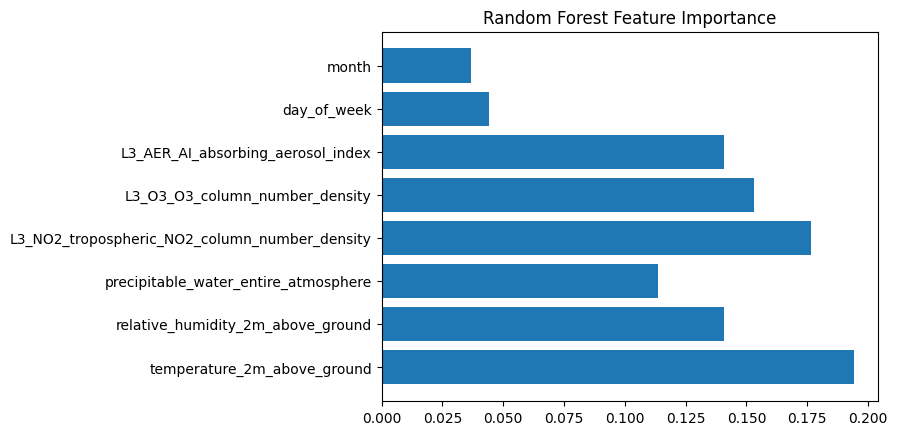

In [119]:
import matplotlib.pyplot as plt

# Plot feature importance
importances = model.feature_importances_
plt.barh(key_features, importances)
plt.title("Random Forest Feature Importance")
plt.show()

**Data preprocess**

In [ ]:
# Drop redundant feature
train_data = train_data.drop(columns=['Place_ID'])
test_data = test_data.drop(columns=['Place_ID'])

# Handling the missing value

In [9]:
missing_threshold = 0.5  # Drop columns with more than 50% missing
missing_ratios = train_data.isnull().mean()
cols_to_drop = missing_ratios[missing_ratios > missing_threshold].index
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)


In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
train_data_imputed = train_data.copy()
test_data_imputed = test_data.copy()

numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'])
train_data_imputed[numeric_cols] = imputer.fit_transform(train_data[numeric_cols])
test_data_imputed[numeric_cols] = imputer.transform(test_data[numeric_cols])


In [19]:
# Convert to datetime
train_data_imputed['Date'] = pd.to_datetime(train_data_imputed['Date'])
train_data_imputed['Month'] = train_data_imputed['Date'].dt.month
train_data_imputed['Day'] = train_data_imputed['Date'].dt.day

test_data_imputed['Date'] = pd.to_datetime(test_data_imputed['Date'])
test_data_imputed['Month'] = test_data_imputed['Date'].dt.month
test_data_imputed['Day'] = test_data_imputed['Date'].dt.day

# Optionally drop original Date
train_data_imputed.drop(['Place_ID X Date', 'Date'], axis=1, inplace=True)
test_data_imputed.drop(['Place_ID X Date', 'Date'], axis=1, inplace=True)


In [20]:
#separte feature and target
y = train_data_imputed['target']
X = train_data_imputed.drop(['target', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1)


In [50]:
#to ensure the same columns
X_test = test_data_imputed[X.columns]  # Ensure same columns

In [55]:
X.shape

(30557, 70)

In [24]:
# Encode 'Place_ID'
le = LabelEncoder()
X['Place_ID'] = le.fit_transform(X['Place_ID'])
# Handle unseen labels in test data by creating a new category
test_data['Place_ID'] = test_data['Place_ID'].map(lambda x: le.transform([x])[0] if x in le.classes_ else len(le.classes_))

In [56]:
X= X.drop(columns=['Place_ID'])
X_test = X_test.drop(columns=['Place_ID'])


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [60]:
y.shape

(30557,)

In [61]:
#train and validation data set separtion
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(solver='sag'),
    #"Random Forest": RandomForestRegressor(random_state=42),
    #"XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}")

Linear Regression: RMSE = 37.24
Ridge Regression: RMSE = 37.30


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [67]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred = model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

In [86]:
print(f"RandomForestRegression: RMSE = {rmse:.2f}")

RandomForestRegression: RMSE = 30.19


In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
gb_rmse = root_mean_squared_error(y_val, y_pred_gb)
print(f"Gradient Boosting: RMSE = {gb_rmse:.2f}")


Gradient Boosting: RMSE = 33.84


In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best RMSE:", -grid_search.best_score_)
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best RMSE: 29.674148193765404
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}


**Build the model**

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error

In [73]:
best_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=7,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

In [74]:
best_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, n_estimators=200,
                          random_state=42)

In [75]:
# Predict on validation set
y_pred = best_model.predict(X_val)

In [76]:
# Final RMSE
from sklearn.metrics import root_mean_squared_error
final_rmse = root_mean_squared_error(y_val, y_pred)
print(f"Final Gradient Boosting RMSE: {final_rmse:.2f}")

Final Gradient Boosting RMSE: 29.29


**perdict by actual test set**

In [91]:
final_predictions = gb_model.predict(X_test)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


**Save the model to submit**

In [92]:
submission = pd.DataFrame({
    "Place_ID X Date": test_data["Place_ID X Date"],
    "target": final_predictions
})
submission.to_csv("submission_v3.csv", index=False)

In [93]:
subm =  pd.read_csv("submission_v1.csv")

In [94]:
subm.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,70.471163
1,0OS9LVX X 2020-01-03,60.175625
2,0OS9LVX X 2020-01-04,64.725602
3,0OS9LVX X 2020-01-05,34.023036
4,0OS9LVX X 2020-01-06,15.779108
